# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [21]:
df_a=pd.read_csv('5_a.csv')
print(df_a.head())

     y     proba
0  1.0  0.637387
1  1.0  0.635165
2  1.0  0.766586
3  1.0  0.724564
4  1.0  0.889199


In [22]:
# write your code here for task A
df_a['predicted']=np.where(df_a['proba']>=0.5,float(1),float(0))
#print(df_a['predicted'])
print(df_a.head())
df = df_a.loc[df_a['predicted'] == 1 ]
#print(df.shape)

     y     proba  predicted
0  1.0  0.637387        1.0
1  1.0  0.635165        1.0
2  1.0  0.766586        1.0
3  1.0  0.724564        1.0
4  1.0  0.889199        1.0


In [23]:
def calc_confusion_matrix(actual_y,predicted_y):
    unique_values=np.unique(actual_y)[::-1]
    l=[]
    #print(unique_values)
    conf_matrix=np.zeros((len(unique_values),len(unique_values)))
    for i in range(len(unique_values)):
        for j in range(len(unique_values)):
            conf_matrix[i,j]=np.sum((actual_y==unique_values[j])&(predicted_y==unique_values[i]))
            l.append(conf_matrix[i,j])
    return conf_matrix,l

## Calculating Confusion Matrix

In [24]:
conf_matrix,l=calc_confusion_matrix(df_a['y'].values,df_a['predicted'].values)
print("Confusion matrix=\n",conf_matrix)
#print(l)

Confusion matrix=
 [[10000.   100.]
 [    0.     0.]]


## Calculating F1-Score And Accuracy Score

In [25]:
tp=l[0]
fp=l[1]
fn=l[2]
tn=l[3]
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=(2*precision*recall)/(precision+recall)
accuracy=(tp+tn)/(tp+fp+tn+fn)
#print("precision=",precision)
#print("recall=",recall)
print("f1_score=",f1_score)
print("Accuracy Score=",accuracy)


f1_score= 0.9950248756218906
Accuracy Score= 0.9900990099009901


In [26]:
def tpr_fpr(df):
    
    tp = ((df['y'] == 1.0 ) & (df['predicted'] == 1.)).sum()
    fp = ((df['y'] == 0.0 ) & (df['predicted'] == 1.)).sum()
    tn = ((df['y'] == 0.0 ) & (df['predicted'] == 0.)).sum()
    fn = ((df['y'] == 1.0 ) & (df['predicted'] == 0.)).sum()

    tpr = tp / (tp + fn )
    fpr = fp / (fp + tn)

    return [tpr, fpr]

def calculate_tpr_fpr(df):
    tpr=[]
    fpr=[]
    #print(df.sort_values(['proba'],ascending=False))
    sorted_values=df.sort_values(['proba'],ascending=False)
    sorted_unique_values=sorted_values['proba'].unique()
    for i in sorted_unique_values:
        sorted_values['predicted']=np.where(sorted_values['proba']>=i,float(1),float(0))
        tpr_fpr_array=tpr_fpr(sorted_values)
        tpr.append(tpr_fpr_array[0])
        fpr.append(tpr_fpr_array[1])
    return tpr,fpr

## Calculating AUC Score

In [27]:
tpr,fpr=calculate_tpr_fpr(df_a)
auc_score=np.trapz(tpr,fpr)
print(auc_score)

0.48829900000000004


## Plotting AUC

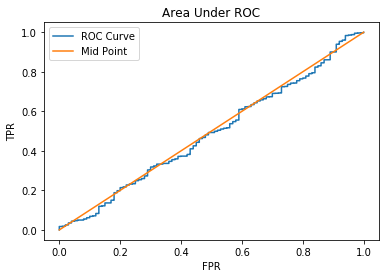

In [28]:
import matplotlib.pyplot as plt
#computed AUC
plt.plot(fpr,tpr,label="ROC Curve")
#default AUC for mean case
plt.plot([0,1],[0,1],label="Mid Point")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Area Under ROC")
plt.legend()
plt.show()

# Task B



## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [29]:
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [30]:
# write your code here for task B
df_b['predicted']=np.where(df_b['proba']>=0.5,float(1),float(0))
#print(df_a['predicted'])
print(df_b.head())
df = df_b.loc[df_b['predicted'] == 0 ]
print(df.shape)

     y     proba  predicted
0  0.0  0.281035        0.0
1  0.0  0.465152        0.0
2  0.0  0.352793        0.0
3  0.0  0.157818        0.0
4  0.0  0.276648        0.0
(9806, 3)


## Calculating Confusion Matrix

In [31]:
conf_matrix,l=calc_confusion_matrix(df_b['y'].values,df_b['predicted'].values)
print("Confusion matrix=\n",conf_matrix)
#print(l)

Confusion matrix=
 [[  55.  239.]
 [  45. 9761.]]


## Calculating F1-Score And Accuracy Score

In [32]:
tp=l[0]
fp=l[1]
fn=l[2]
tn=l[3]
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=(2*precision*recall)/(precision+recall)
accuracy=(tp+tn)/(tp+fp+tn+fn)
#print("precision=",precision)
#print("recall=",recall)
print("f1_score=",f1_score)
print("Accuracy Score=",accuracy)

f1_score= 0.2791878172588833
Accuracy Score= 0.9718811881188119


## Calculating AUC Score

In [34]:
tpr,fpr=calculate_tpr_fpr(df_b)
auc_score=np.trapz(tpr,fpr)
print(auc_score)

0.9377570000000001


## Plotting AUC

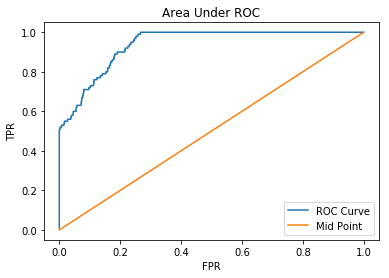

In [35]:
plt.plot(fpr,tpr,label="ROC Curve")
#default AUC for mean case
plt.plot([0,1],[0,1],label="Mid Point")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Area Under ROC")
plt.legend()
plt.show()

## Observation-> 
Here as we can see value of f1-score is very less but the dataset 5_a and 5_b are both similar in a way that they are inbalanced.
This is because f1-score only depends on TP. It does not depend on TN. 

# Task C

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [36]:
df_c=pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [37]:
# write your code for task C
def finding_a(df):
    
    tp = ((df['y'] == 1.0 ) & (df['predicted'] == 1.)).sum()
    fp = ((df['y'] == 0.0 ) & (df['predicted'] == 1.)).sum()
    tn = ((df['y'] == 0.0 ) & (df['predicted'] == 0.)).sum()
    fn = ((df['y'] == 1.0 ) & (df['predicted'] == 0.)).sum()

    a=500*fn+100*fp
    return a

def calculate_min_thresh(df):
    # float('inf') used for infinity
    min_a=float('inf')
    min_thresh=0
    #print(df.sort_values(['proba'],ascending=False))
    sorted_values=df.sort_values(['prob'],ascending=False)
    sorted_unique_values=sorted_values['prob'].unique()
    for i in sorted_unique_values:
        sorted_values['predicted']=np.where(sorted_values['prob']>=i,float(1),float(0))
        a=finding_a(sorted_values)
        if(a<=min_a):
            #print("helo")
            min_a=a
            min_thresh=i
    return min_a,min_thresh

## Minimum Threshold

In [38]:
calculate_min_thresh(df_c)

(141000, 0.2300390278970873)

# Task D


## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [39]:
df_d=pd.read_csv('5_d.csv')
df_d.head()

df = df_d.loc[df_d['y']==0 ]
#print(df.shape)

## Calculating MSE, MAPE, R2 Error

In [40]:
# write your code for task 5d
def calculate_r2(df):
    #print(df.shape)
    ss_resi=((df['y']-df['pred'])**2).sum()
    ss_total=((df['y']-df['y'].mean())**2).sum()
    mse=ss_resi/df.shape[0]
    mape=((abs(df['y']-df['pred'])/df['y'].mean())*100).sum()/df.shape[0]
    print("Mean Sqared Error=",mse)
    print("Mean Absolute percentage Error=",mape)
    print("R2 Error=",1-(ss_resi/ss_total))
    return 

calculate_r2(df_d)
    

Mean Sqared Error= 177.16569974554707
Mean Absolute percentage Error= 12.91202994009687
R2 Error= 0.9563582786990937
